In [1]:
# Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

In [2]:
# Store filepath in a variable
city_file = "../raw_data/city_data.csv"
# Read our Data file with the pandas library
city_df = pd.read_csv(city_file)
city_df.sort_values("city",inplace=True)
# Analyze the data
# len(city_df.index)
# city_df.describe()
# city_df.info()
# For data analysis: Export file as an XLSX, w/o index, w/ header
# city_df.to_excel("../output/city_source.xlsx", index=False, header=True)

In [3]:
# Store filepath in a variable
ride_file = "../raw_data/ride_data.csv"
# Read our Data file with the pandas library and parse the date as datetime
ride_df = pd.read_csv(ride_file, parse_dates=["date"])
ride_df.sort_values("city",inplace=True)
# Analyze the data
# len(ride_df.index)
# ride_df.describe()
# ride_df.info()
# For data analysis: Export file as an XLSX, w/o index, w/ header
# ride_df.to_excel("../output/ride_source.xlsx", index=False, header=True)

In [4]:
# Merge the two dataframes on the "city" field
# re-order columns: city, date, fare, ride_id, driver_count, type and sort by "city"
pyber_df = pd.merge(city_df, ride_df, on=("city"), how="inner", suffixes=("_x", "_y"))
pyber_df = pyber_df[["city", "date", "fare", "ride_id", "driver_count", "type"]].\
                     sort_values("city")
pyber_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
30,Alvarezhaven,2016-05-15 20:43:44,40.04,1806812593131,21,Urban
29,Alvarezhaven,2016-02-07 02:46:18,35.22,5405756761666,21,Urban
28,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,21,Urban
27,Alvarezhaven,2016-09-23 21:51:59,17.67,3829336915201,21,Urban


# Data Comments

# Source Data Modification Comments: 

When loading the data, there are 2375 rows in ride_data.csv, so I wondered why  did I have 2407 
rows when I merged the city and ride data?  The answer was that there were two records for 
Port James in city_data.csv, one with 3 drivers and the other with 15 drivers.  Since, I was 
going to use this data set in future processes, I made the decision to manually remove one record 
and change the driver count to 18 for the remaining record.  This change resulted in expected and 
reasonable record counts when merging, summing, or manipulating the data sets.

## Data Trend Analysis:
1)It might seem obvious but there are more people using Pyber in an urban setting.  It makes 
sense that people in a city may either not have a car or don't want to use it in the city due to 
traffic or parking and  using a ride service can be convenient and cost effective.  On the other 
hand, people in rural and suburban environments live there because they want to be in an non-urban 
environment, and since public transportation services are limited to non-existent, inconvenient, 
and expensive  outside of cities, these people would be mostly self-sufficient in the 
transportation department, so they would use the service less.  Drawing on my experience and 
knowledge, people in rural and suburban areas would use ride services in special situations like 
going to the airport where you might not want to leave your car, and since services that older 
people use are in urban to suburban  areas, they would in many case have the option to use a ride 
service to get to those services.  And the difference between suburban and rural usage could be 
related to how close suburbanites are to a city and its amenities, greater availability of public 
transportation, and ride services like Pyber ride share.

2)Cost surprised me a little because there is a pretty good distribution of rides to cost across 
the three types.  There were some outliers, but they weren't numerous and didn't seem a concern.  
I would have guessed that urban users would do more and shorter trips resulting in more rides and 
more at a lower cost than other groups, and that was displayed in the data.  I never have used a 
Pyber type ride service, so I don't know about the costs, but I have to think that especially rural 
and suburban users, cost would impact the number of rides they take which supports my assumption 
that usage would mainly be for special occasions or services.   Another possible cost savings and 
incentive for urban people would cost sharing that is possible in that setting.  If we added a few 
more data points, we could have a lot of interesting information, and information that might be 
helpful in advertising for business growth.  

3)As for the number of drivers, I was surprised by the size of some the gold bubbles because these 
are related rural cities, and I would expect fewer drivers but that wasn't the case.  It seems from 
looking at the color and size of the data that there are an adequete number of drivers in a lot of 
cases for rural drivers.  Certainly, the suburban users had enough drivers to choose from, and usage 
correlates or drives(supply and demand) the need for drivers which is also  shown by the urban 
bubbles.  I would expect more bubbles and bigger bubbles in a city and the bubble chart supports this 
expectation.  From television, not experience, I have an idea that it is hard for people to get a 
taxi, so if you look at the bubbles there is certainly more demand and supply as the environment 
moves from rural to urban.  Is the real or perceived lack of taxis driving the demand for a Pyber 
like service?  It might be good to look further into why people choose a Pyber type service over a 
taxi.  In any case, the number of drivers looks adequete for all environments.

4)In conclusion, this was interesting data, and I can think of other information that might make it 
more useful and informative, like male/female usage, reason for usage, other alternatives to Pyber, 
satisfaction/dissatisfaction with the service, and crime statistics just to name a few.

# BEGIN DATA ORGANIZATION AND CHARTING

In [5]:
# Bubble Plot of Pyber Data
# Collect data for the bubble plot

## Average Fare ($) Per City is the y-axis
## group by ["city"] and get the fare.mean()
average_fare = pyber_df.groupby(["city"], as_index=False)["fare"].mean().rename(columns={
    "fare": "avg_fare"})
average_fare.head(5)
#average_fare.info()
#average_fare.decribe()
#print(len(average_fare))
# max_fare = average_fare["avg_fare"].max()
# max_fare

,city,avg_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [ ]:
## Total Number of Rides Per City is the x-axis
## group by ["city"] and get the ride_id.count()
total_rides = pyber_df.groupby(["city"], as_index=False)["ride_id"].count().rename(columns={
    "ride_id": "ride_count"})
total_rides.head(5)
#total_rides.info()
#total_rides.describe()
#print(len(total_rides))
# max_rides = total_rides["ride_count"].max()
# max_rides

In [ ]:
# Total Number of Drivers Per City correlates to bubble size

# Uses city_df
dcounts_df = city_df[["city","driver_count"]]
dcounts_df.head(5)
#dcounts_df.info()
#dcounts_df.describe()
#len(dcounts_df)

In [ ]:
# City Type (Urban, Suburban, Rural) is the color legend upper right

# Uses city_df, has 125 entries
city_type_df = city_df[["city","type"]] #.reset_index(drop=True)
city_type_df.head(5)
#city_type_df.info()
#city_type_df.describe()
#len(city_type_df)

In [13]:
# City Type (Urban, Suburban, Rural) for color legend
citytype = pyber_df["type"].unique()
#citytype.sort()
print(citytype)

['Urban' 'Suburban' 'Rural']


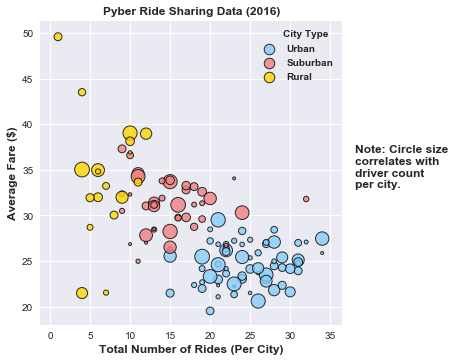

In [14]:
# # Pyber_hw4.ipynb
# # See the following for program documentation:
# # myPyber_HW4_Steps.docx -- my high level program steps
# # README_HW4.md  -- HW4 assignment .md file
# # 
# # Bubble Chart Relationships:
# # x axis is total rides, y axis is average fares 
# # colors are related to type (i.e. "Rural" = "gold")
# # driver count is related to bubble size
# #-----------------------------------------------------------------------------------
# # Seaborn.lmplot was used as a model.  The lmplot function combines regplot() 
# # and FacetGrid. It is intended as a convenient interface to fit regression 
# # models across conditional subsets of a dataset.
# # http://seaborn.pydata.org/generated/seaborn.lmplot.html
# #-----------------------------------------------------------------------------------
# #
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

# #-----------------------------------------------------------------------------------

# all lists should have 125 elements
y_fare = average_fare["avg_fare"]
x_ride = total_rides["ride_count"]
# print("y_fare is ", y_fare.head())
# print("x_ride is ", x_ride.head())

# Set my default color palette
mycolors = ["lightskyblue", "lightcoral", "gold"]
sns.set_palette(mycolors)
#sns.palplot(sns.color_palette())

# color is related to "city" type 
colors = {"Urban":"lightskyblue", "Suburban":"lightcoral", "Rural":"gold"}
#print("dataframe colors is ", colors)

# Apply the colors to the "city" type
ctype = city_type_df["type"].apply(lambda x: colors[x])
#print(ctype)

b_df = pd.DataFrame(dict(x=x_ride, y=y_fare, color=ctype))
#b_df

# #-----------------------------------------------------------------------------------
# bubble size modification of dcount_df
markersize_df = 10000* dcounts_df["driver_count"] / sum(dcounts_df["driver_count"])
markersize_df

lm = sns.lmplot(x="x", y="y", data=b_df, hue="color", legend=False, fit_reg=False, 
           scatter_kws={"s": markersize_df, 'linewidths':1,'edgecolor':'k'})
sns.set_style("darkgrid")
sns.plt.title("Pyber Ride Sharing Data (2016)", weight='bold').set_fontsize('12')
sns.plt.xlabel("Total Number of Rides (Per City)", weight='bold').set_fontsize('12')
sns.plt.ylabel("Average Fare ($)", weight='bold',).set_fontsize('12')

# Note on the right hand side of the chart
lm.fig.text(1, .5,"Note: Circle size\ncorrelates with\ndriver count\nper city.", 
            fontsize=12, weight='bold', rotation=360)

# Legend Title
lm.fig.text(.8, .92,"City Type", 
            fontsize=10, weight='bold', rotation=360)

# #-----------------------------------------------------------------------------------
legend_properties = {"weight":"bold"}
plt.legend([citytype[0], citytype[1], citytype[2]], title=" ", prop=legend_properties, loc=1)
plt.savefig("./chart_images/pyber_bubble_chart.png",bbox_inches="tight")
plt.show()

In [15]:
#average_fare.shape, total_rides.shape

In [16]:
# City Type (Urban, Suburban, Rural) is the color legend upper right
# groupby or unique list of type called "city type"
citytype = pyber_df["type"].unique()
citytype.sort()
print(citytype)

['Rural' 'Suburban' 'Urban']


In [17]:
# Create data for pie chart % of Total Fares by City-"Type".

total_fares = pyber_df.groupby(["type"], as_index=False)["fare"].sum()
#print(total_fares)
#total_fares.info()
#total_fares.columns


sum_fares = total_fares["fare"].sum()
#print(sum_fares)
#sum_fares.info()
#sum_fares.columns

# append percentages into a list
fares_pct = []
for i in range(0, len(total_fares)):
    #print( round(((total_fares.iloc[i].fare/sum_fares)* 100),2))
    fares_pct.append(round(((total_fares.iloc[i].fare/sum_fares)* 100),2))
#print(rides_pct)

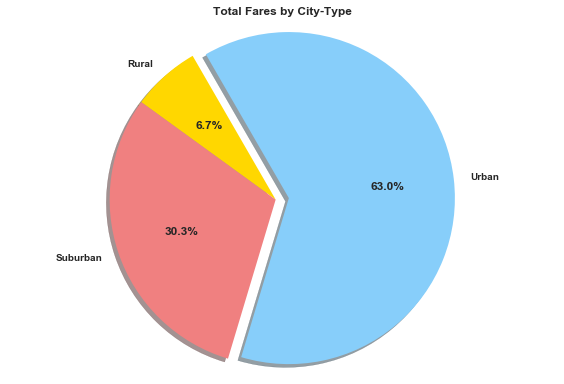

In [18]:
# hw4_pie_chart1.py
#

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
 
# https://matplotlib.org/2.0.0b4/examples/color/named_colors.html

fig = plt.figure()
ax = fig.add_subplot(111)

types = citytype
f_pct = fares_pct

colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)

x_axis = np.arange(0, len(types))

ax.set_title("Total Fares by City-Type", weight='bold')
ax.pie(f_pct, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", textprops={'weight': 'bold'}, 
       shadow=True, startangle=120)
ax.axis("equal")

plt.tight_layout()
plt.savefig("./chart_images/fares_city-type%_pie_chart.png")
plt.show()

# Total Fares by City-Type

The pie chart for Total Fares by City-Type shows what I would have expected in 
that Urban people use the ride service the most, followed by Suburban, and 
Rural.  The percentage of fares to city type is reasonable and expected so no 
outlier situations are obvious.  The percentages were created by summing the 
number of fares for each city type, and then dividing each sum by the total of 
all fares.  This is also known as: part / whole = %.

In [20]:
# Create data for pie chart % of Total Rides by City-"Type".

total_rides = pyber_df.groupby(["type"], as_index=False)["ride_id"].count()
#print (total_rides)
#total_rides.info()
#total_rides.columns

# 2407 total rides
sum_rides = total_rides["ride_id"].sum()
#sum_rides
#sum_rides.info()
#sum_rides.columns

# append percentages into a list
rides_pct = []
for i in range(0, len(total_rides)):
    #print( round(((total_rides.iloc[i].ride_id/sum_rides)* 100),2))
    rides_pct.append(round(((total_rides.iloc[i].ride_id/sum_rides)* 100),2))
#print(rides_pct)

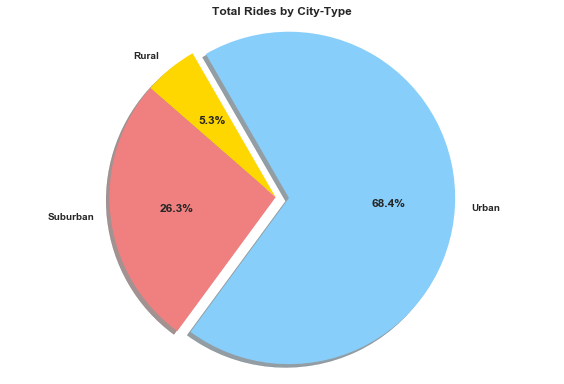

In [21]:
# hw4_pie_chart2.py
#

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
 
# https://matplotlib.org/2.0.0b4/examples/color/named_colors.html

fig = plt.figure()
ax = fig.add_subplot(111)

types = citytype
r_pct = rides_pct

colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)

x_axis = np.arange(0, len(types))

ax.set_title("Total Rides by City-Type", weight='bold')
ax.pie(r_pct, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", textprops={'weight': 'bold'}, 
       shadow=True, startangle=120)
ax.axis("equal")

plt.tight_layout()
plt.savefig("./chart_images/rides_city-type%_pie_chart.png")
plt.show()

# Total Rides by City-Type:
Again the data displayed results that were expected, and not a whole lot of other 
information.  Pie charts seem like big picture tools, so they are doing their job 
in this case.  There were more rides in Urban areas than Suburban areas and the 
same with Rural areas.  This isn't a surprise, but could lead to a need to look at 
the data or data collected differently.  It is a good start.  .  The percentages 
were created by counting the number of rides for each city type, and then dividing 
each count by the total of all rides.  This is also known as: part / whole which 
is the %.

In [23]:
# Create datat for pie chart % of Total Drivers by City-"Type".

# Create new dataframe with only 3 columns--note the double brackets
summary_df = pyber_df[["city", "type", "driver_count"]]
#summary_df.head()

# Remove the duplicates from the dataframe to sum driver_count
unique_rows = summary_df.drop_duplicates()
#unique_rows

total_drivers = unique_rows.groupby(["type"], as_index=False)["driver_count"].sum()
#print(total_drivers)
#total_drivers.describe()
#total_drivers.columns

# Total of Drivers = 3349
sum_drivers = total_drivers["driver_count"].sum()
#print(sum_drivers)

# append percentages into a list
driver_pct = []
for i in range(0, len(total_drivers)):
    #print( round(((total_drivers.iloc[i].driver_count/sum_drivers)* 100),2))
    driver_pct.append(round(((total_drivers.iloc[i].driver_count/sum_drivers)* 100),2))
#print(driver_pct)

# Validation check "Rural" adds up to the sum above
#unique_rows.loc[unique_rows["type"]== "Rural"]

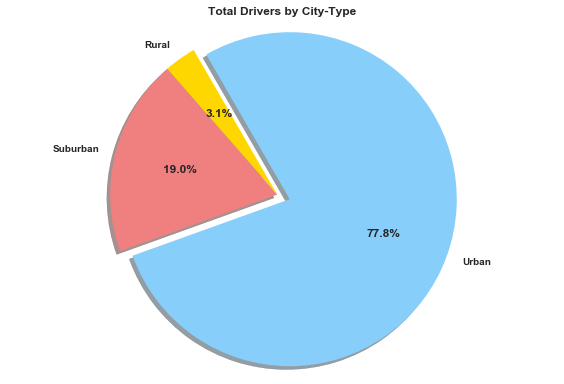

In [24]:
# hw4_pie_chart3.py
#

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
 
# https://matplotlib.org/2.0.0b4/examples/color/named_colors.html

fig = plt.figure()
ax = fig.add_subplot(111)

types = citytype
d_pct = driver_pct

colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.08)

x_axis = np.arange(0, len(types))

ax.set_title("Total Drivers by City-Type", weight='bold')
ax.pie(d_pct, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", textprops={'weight': 'bold'}, 
       shadow=True, startangle=120)
ax.axis("equal")

plt.tight_layout()
plt.savefig("./chart_images/drivers_city-type%_pie_chart.png")
plt.show()

# Total Drivers by City-Type:

The pie chart percentages reflect expectations, other charts, and knowledge 
gained from doing this project.  The number of drivers for Urban areas is 
the greatest with Suburban next, and Rural bringing up the rear.  The data 
makes sense and reflects supply and demand.  What isn't visible in this 
chart but can be seen in a bubble chart is that there is a surprising number 
of drivers available to Rural users of the service, although that would 
depend on where they live.  The percentages were created by counting the 
number of drivers from the city_data.csv because this has one driver count 
per city without doing any work.  The driver counts were grouped by city, by 
type and each group count was dived by the total driver count.  This is also 
known as: part / whole which is the %. 